In [2]:
import pickle
import pandas as pd
pd.set_option('max_colwidth',100)
import numpy as np
import matplotlib.pyplot as plt
#import pillow
from wordcloud import WordCloud
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from textwrap import wrap

In [3]:
# Load in the files 
infile = open('data_files/comedian_corpus','rb')
data = pickle.load(infile)
infile.close()
data.head()

infile = open('data_files/comedian_dtm','rb')
dtm = pickle.load(infile)
infile.close()
dtm.head()

infile = open('data_files/stop_words','rb')
stop_words = pickle.load(infile)
infile.close()

## Most Common Words

Lets start by looking at the most common words in each of the sets

### Analysis

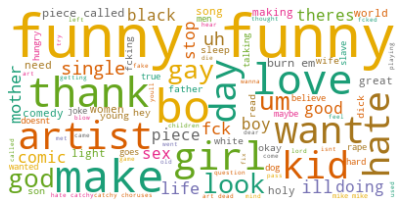

In [4]:
# Create and generate a word cloud image:
wc = WordCloud(stopwords = stop_words, background_color="white", colormap="Dark2", max_words = 100,
               max_font_size=125, collocations = True, random_state=42)

wc.generate(data.sketch_text[0])

# Display the generated image:
plt.figure(figsize = (7,4))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

While it looks like 'whats' and 'funny' are repeated, the wordcloud has actually found a bigram 'whats funny' which is featured heavily in one of his songs.

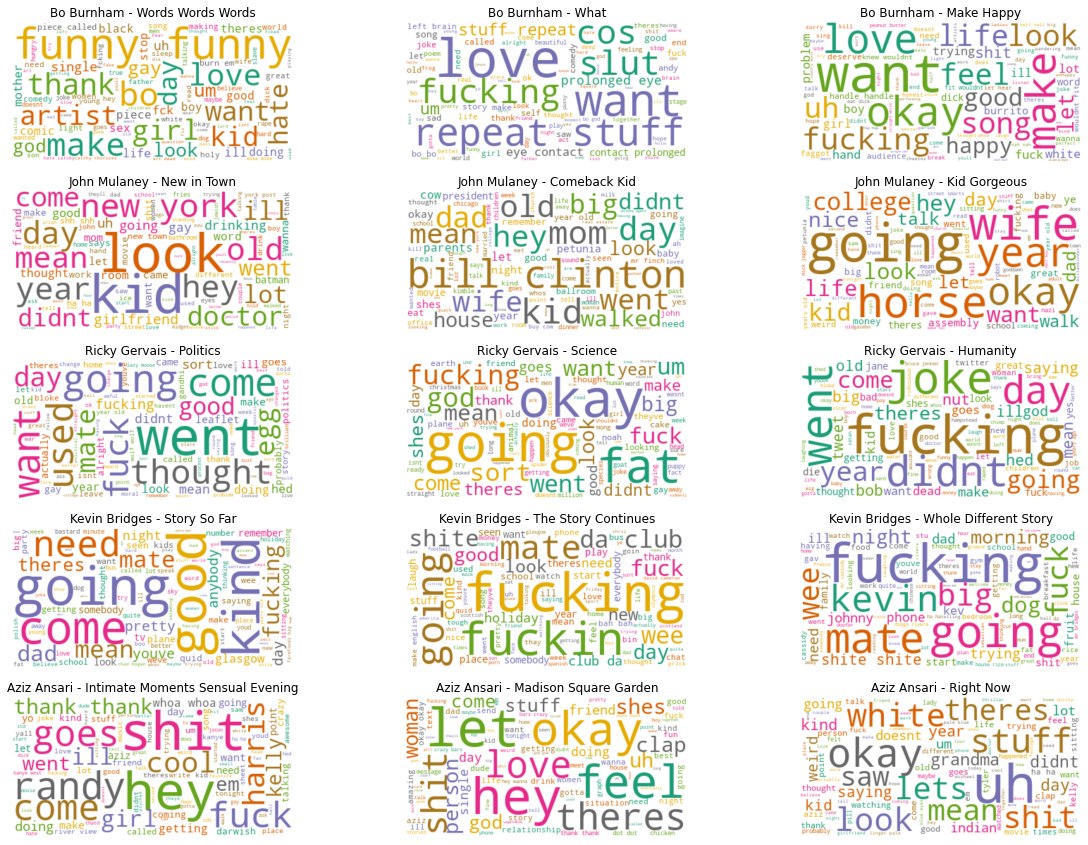

In [5]:
plt.figure(figsize = (20,15))

wc = WordCloud(stopwords = stop_words, background_color="white", colormap="Dark2", max_words = 100,
               max_font_size=75, collocations = True, random_state=42)

# Create subplots for each comedian
count = 0
for show in data.index:
    wc.generate(data.sketch_text[show])
    plt.subplot(5, 3, count + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data.index[count])
    count +=1
    
plt.show()

## Findings
We can now see some themes for each of the sketches from these wordclouds:
* Bo: Love seems to be a common theme for Bo, we can also see the some of longer song lyrics (whats funny & repeat stuff)
* John: Family seems to be a common theme for John as well as talking about his life (i.e. doctor, meeting bill clinton and going to college.
* Ricky: Seems to have very varied sets though has started swearing more in his most recent show.
* Kevin: There is a lot of profanity in Kevins sets though it looks like he tells lots of stories about his friends (from the occurences of 'mate')
* Aziz: His first two shows seem to be based on relationships, while his last set seems more varied in themese.

## Number of words

Next lets look at comedians use of words

In [6]:
# Find the words that each show includes
volcabulary_size = []
for show in dtm.columns:
    volcabulary_size.append(dtm[dtm[show] > 0].shape[0])

total_words_dtm = []
for show in dtm.columns:
    total_words_dtm.append(sum(dtm[show]))
    
total_words = []
for show in dtm.columns:
    sketch_str = data.sketch_text[show]
    total_words.append(len(data.sketch_text[show].split()))

In [7]:
# Add some columns to plot into our data table
data['vocab_size'] = volcabulary_size
data['total_words'] = total_words
data['total_words_dtm'] = total_words_dtm
data['wpm_dtm'] = round(data['total_words_dtm'] / data['run_time'],0)
data['wpm'] = round(data['total_words'] / data['run_time'],0)
# data.head()

In [8]:
# Prep some variables to make my graphs look neater
clrs = [sns.color_palette('Blues',3),sns.color_palette('Reds',3),sns.color_palette('Greys',3),sns.color_palette('Greens',3)
       ,sns.color_palette('Purples',3)] # set our comedians a specific colour
clrs_list = [color for color_palette in clrs for color in color_palette] # prep our colour list for the graph
show_labels = ['\n'.join(wrap(l,15)) for l in data.index] # wrap my show names so they fit in the graphs

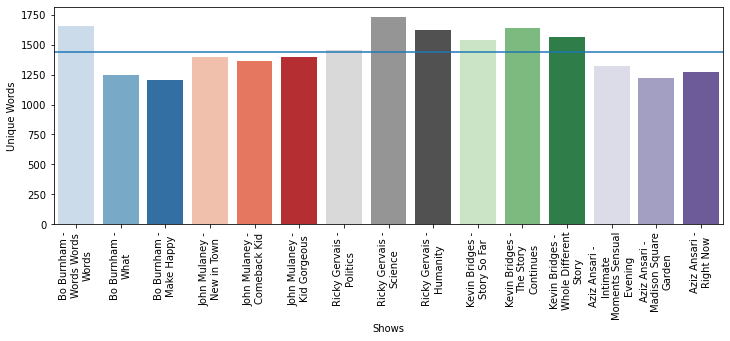

In [9]:
plt.figure(figsize = (12,4))
vocab_graph = sns.barplot(x = show_labels, y = data.vocab_size, palette = clrs_list)
vocab_graph.set(xlabel = 'Shows', ylabel = 'Unique Words')
vocab_graph.axhline(round(data.vocab_size.mean(),2))
for item in vocab_graph.get_xticklabels():
    item.set_rotation(90)

- We can see that 3 of our comedians used a similarly sized vocabulary through all of their shows.
- Bo drastically reduced the number of words by 25% between his first and second show.
- Ricky used nearly 19% more unique words in his second show and consistently uses the largest vocabulary, which makes sense as he is considered an intelletual comedian.
- Suprisngly Kevin uses the second most words in his sets, consitently above the 1500 mark.

In [11]:
#Add some extra columns to make it easier to plot our graphs

show_num = ['1','2','3','1','2','3','1','2','3','1','2','3','1','2','3']
data['show_num'] = show_num
data['temp'] = data.index.str.split('-')
df_temp = pd.DataFrame(data.temp.tolist(), index= data.index, columns = ['comedian','show_name'])
df_temp.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data = data.join(other = df_temp, on = data.index, how = 'left', lsuffix = '_l')
data = data.drop(columns = 'temp')

No handles with labels found to put in legend.


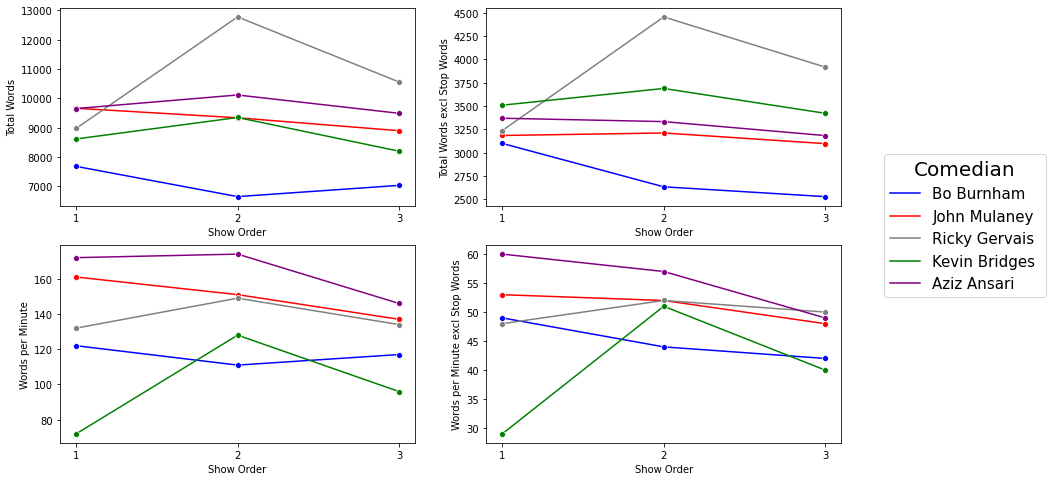

In [13]:
plt.figure(figsize = (14,8))
plt.legend(title = 'Comedian')
count = 0
Titles = ['Total Words', 'Total Words excl Stop Words', 'Words per Minute', 'Words per Minute excl Stop Words']
for graph_iter in ['total_words','total_words_dtm','wpm','wpm_dtm']:
    if count == 3: 
        plt.subplot(2, 2, count + 1)
        graph = sns.lineplot(x = data.show_num, y = data[graph_iter], hue = data.comedian, palette = ['Blue','Red','Grey','Green','Purple'],
                             marker = 'o', legend=True)
        handles, labels = graph.get_legend_handles_labels()
        graph.legend(handles=handles, labels=labels, title='Comedian', bbox_to_anchor=(1.1, 1.5), loc='upper left', prop={'size': 15})
        plt.setp(graph.get_legend().get_title(), fontsize='20')
        graph.set(xlabel = 'Show Order', ylabel = Titles[count])
        break
    plt.subplot(2, 2, count + 1)
    graph = sns.lineplot(x = data.show_num, y = data[graph_iter], hue = data.comedian, palette = ['Blue','Red','Grey','Green','Purple'], 
                         marker = 'o', legend = False)
    graph.set(xlabel = 'Show Order', ylabel = Titles[count])
    count +=1

## Analysis

- Ricky consistently uses a lot of words to get his point across (both unique words and stop words). However, as his shows are a bit longer than average, his words per minute are near the average for our comedians.
- Aziz is constantly the quickest speaker of our comedians, perhaps as he focuses on an American audience who prefer shorter sharper sets than UK audiences.
- Kevin also uses a lot of words but his sets are much longer than the average, so his words per minute are lower than average for our comedians.
- John & Bo are fairly consistent throughout all their shows so it looks like their delivery styles remained consistent.

In [14]:
%%capture
print(total_words)
print(data.run_time)

## Profanity

In [16]:
%%capture
dtm.loc[['fuck','fck','fucks','fuckin','fucking','fucker','fcker','shit','shits','shitting','shittin'],:].head()
f_data = dtm.loc[['fuck','fck','fucks','fuckin','fucking','fucker','fcker'],:]
f_data = f_data.transpose()
f_data['f_total'] = f_data.loc[:,'fuck':'fcker'].sum(axis = 1)
s_data = dtm.loc[['shit','shits','shitting','shittin'],:]
s_data = s_data.transpose()
s_data['s_total'] = s_data.loc[:,'shit':'shittin'].sum(axis = 1)
data = data.join(other = f_data['f_total'], on = data.index, how = 'left', lsuffix='_l')
data = data.join(other = s_data['s_total'], on = data.index, how = 'left', lsuffix='_l')

Text(0, 0.5, 'Number of S words used')

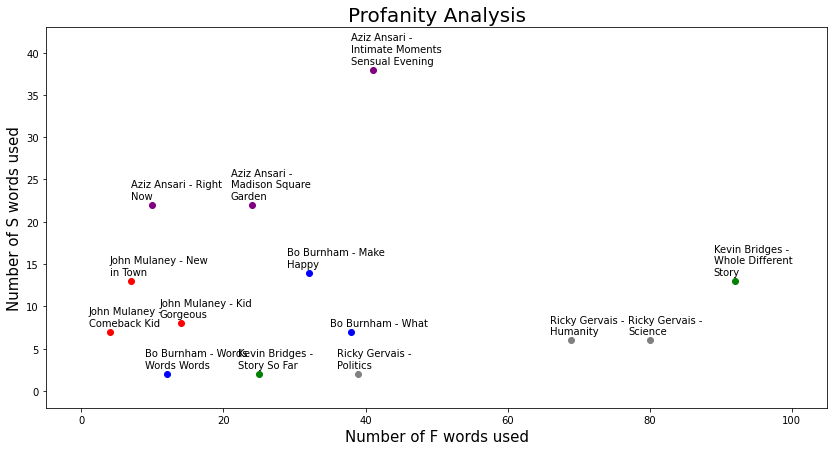

In [17]:
plt.figure(figsize = (14,7))
color = ['Blue','Blue','Blue','Red','Red','Red','Grey','Grey','Grey','Green','Green','Green','Purple','Purple','Purple']
show_labels = ['\n'.join(wrap(l,20)) for l in data.index] # wrap my show names so they fit in the graphs
count = 0
prof_data = data.drop(index = 'Kevin Bridges - The Story Continues')
show_labels = ['\n'.join(wrap(l,20)) for l in prof_data.index] # wrap my show names so they fit in the graphs
color = ['Blue','Blue','Blue','Red','Red','Red','Grey','Grey','Grey','Green','Green','Purple','Purple','Purple']
for graph_iter in prof_data.index: 
    plt.xlim(-5, 105)
    plt.ylim(-2, 43)
#for graph_iter in data.index:    
    x = data.f_total.loc[graph_iter]
    y = data.s_total.loc[graph_iter]
    plt.scatter(x, y, color=color[count])
    plt.text(x-3, y+0.7, show_labels[count], fontsize=10)
    count +=1
plt.title('Profanity Analysis', fontsize=20)
plt.xlabel('Number of F words used', fontsize=15)
plt.ylabel('Number of S words used', fontsize=15)

We've excluded Kevin's second show as he used 159 F bombs during his set which made the point labels unreadable. 
- We can see Aziz consistently uses the S word more than all our other comedians. 
- John & Bo both use the F word in moderation, between 0 - 20 and 10-40 respectively for all their shows.
- Ricky nearly doubled used F word usage between his first 2 shows while Kevin used 25, 159 and 92 in his respective shows (a 500% increase!)

We can also work out how often our comedians are swearing throughout their sets

In [18]:
data['profanity'] = data.f_total + data.s_total
data['ppm'] = data.profanity / data.run_time
print('Our worst offending show is:', data[data.ppm == data.ppm.max()].index[0], 'with', round(data.ppm.max(),1), 'swear words a minute')
print('The cleanest show is:', data[data.ppm == data.ppm.min()].index[0], 'with', round(data.ppm.min(),1), 'swear words a minute')

Our worst offending show is: Kevin Bridges - The Story Continues with 2.3 swear words a minute
The cleanest show is: John Mulaney - Comeback Kid with 0.2 swear words a minute


In [ ]:
outfile = open('data_files/comedian_corpus','wb')
pickle.dump(data, outfile)
outfile.close()